In [71]:
import pandas as pd
import requests
import time
import datetime
import talib
import numpy as np
 
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
df = pd.read_csv('rsidata.csv')

df = df[['Open', 'High', 'Low', 'Close']]
df['Open'] = df['Open'].astype('float')
df['High'] = df['High'].astype('float')
df['Low'] = df['Low'].astype('float')
df['Close'] = df['Close'].astype('float')
df

,Open,High,Low,Close
0,0.8298,0.8557,0.8297,0.8507
1,0.8508,0.8667,0.8372,0.8586
2,0.8586,0.8587,0.8213,0.8324
3,0.8324,0.8456,0.7794,0.8228
4,0.8227,0.8372,0.7092,0.7726
...,...,...,...,...
268,0.4916,0.5020,0.4576,0.4683
269,0.4682,0.4882,0.4350,0.4457
270,0.4458,0.4558,0.4168,0.4489
271,0.4491,0.5109,0.4266,0.4877


In [81]:
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
df.tail(10)

,Open,High,Low,Close,RSI_14
263,0.4139,0.4340,0.3800,0.3936,60.025430
264,0.3936,0.5000,0.3933,0.4862,73.526990
265,0.4861,0.5590,0.4564,0.5069,75.517651
266,0.5069,0.5195,0.4717,0.4878,70.267226
267,0.4879,0.5215,0.4757,0.4917,70.714947
268,0.4916,0.5020,0.4576,0.4683,64.444556
269,0.4682,0.4882,0.4350,0.4457,59.002865
270,0.4458,0.4558,0.4168,0.4489,59.524025
271,0.4491,0.5109,0.4266,0.4877,65.286198
272,0.4876,0.4992,0.4667,0.4799,63.334220


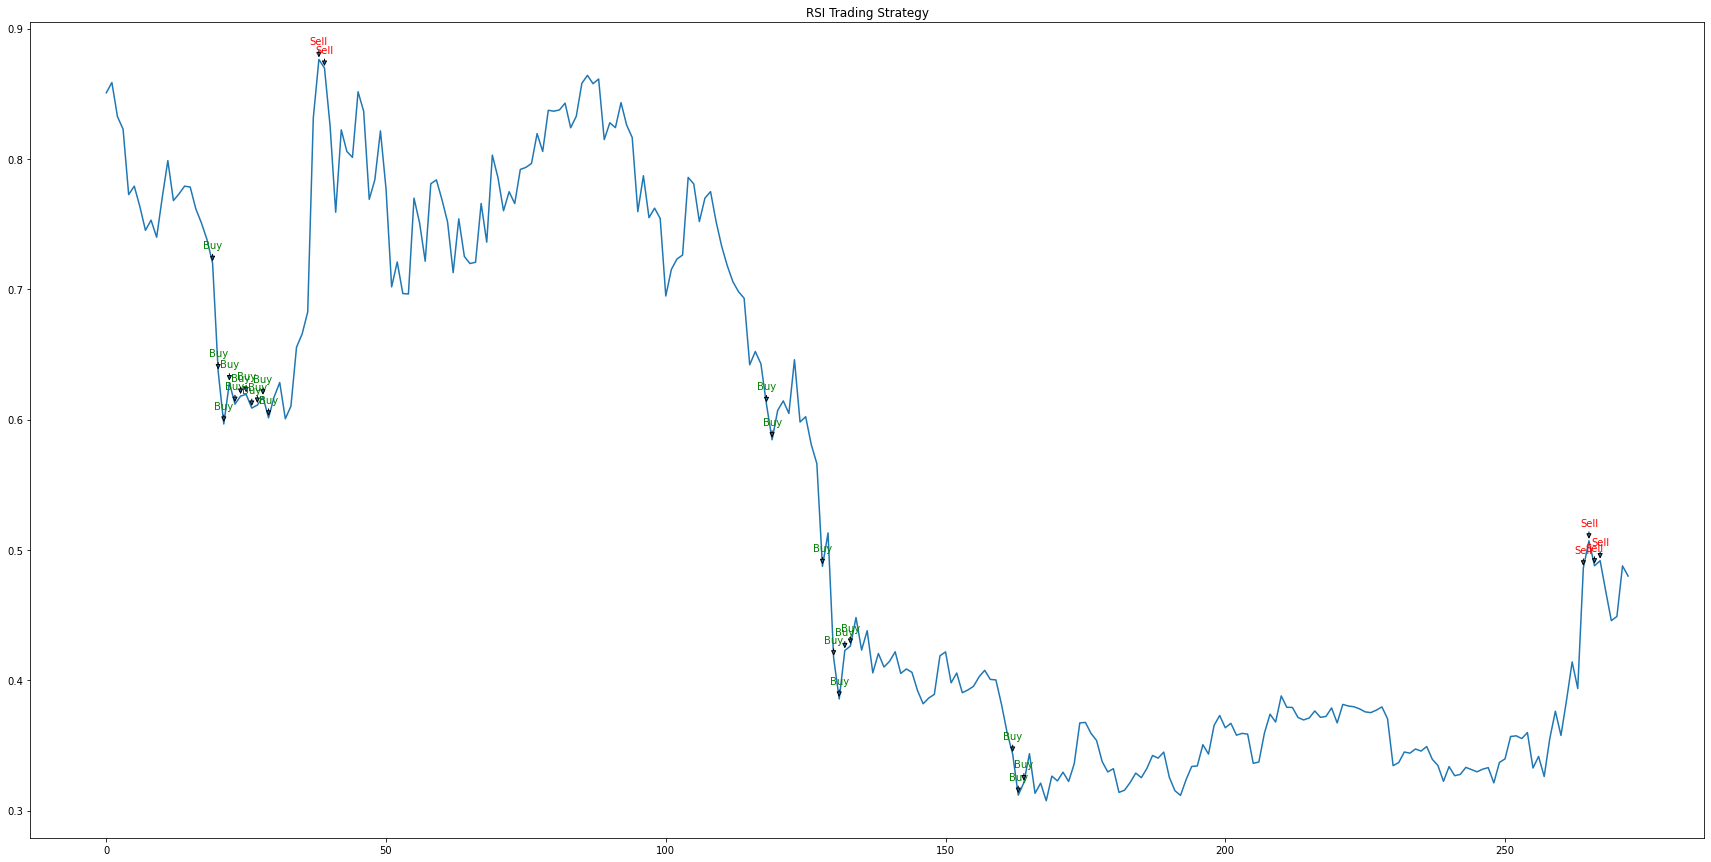

In [82]:
def rsi_trend(x):
    if x<30:
        return "Buy"
    if x>70:
        return "Sell"
 
df['RSI_Trend'] = df['RSI_14'].apply(lambda x:rsi_trend(x))
 
 
ax = df.Close.plot(figsize=(30,15), title= "RSI Trading Strategy" )
for i in range(df.shape[0]):
    label = df.RSI_Trend[i]
    if label=='Sell':
        ax.annotate(label,
             (df.index[i], df['Close'][i]),
             xytext=(0, 15), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'), color='r', ha='center')
    if label=='Buy':
        ax.annotate(label,
             (df.index[i], df['Close'][i]),
             xytext=(0, 15), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'), color='g', ha='center')

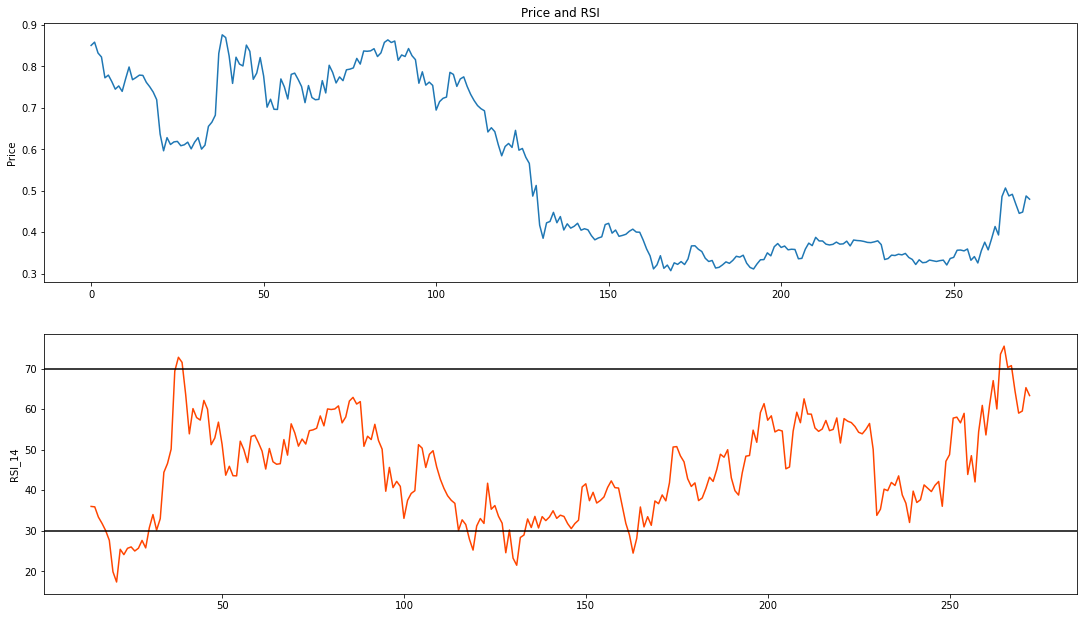

In [83]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(18.5, 10.5)
# plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(df['Close'])
ax2.set_ylabel('RSI_14')
ax2.plot(df['RSI_14'], color='orangered')
ax2.axhline(y = 30, color = 'black', linestyle = '-')
ax2.axhline(y = 70, color = 'black', linestyle = '-')
ax1.set_title('Price and RSI')
plt.show()


<h3>Apply and Back Test the RSI Trading Strategy
</h3>

In [84]:
trades = []
tmp = df.copy()
tmp['rn'] = np.arange(len(tmp))
last_i = tmp.rn.max()
status = 'neutral'
for i in tmp.rn:
    if (i == last_i) and (status == 'long'):
        trades.append((i,'sell',tmp.loc[tmp.rn==i]['Close'][0]))
    elif (tmp.loc[tmp.rn==i]['RSI_14'].values[0]<30) and (status == 'neutral'):
        trades.append((i, 'buy', tmp.loc[tmp.rn==i]['Close'][0]))
        status = 'long'
    elif (tmp.loc[tmp.rn==i]['RSI_14'].values[0]>70) and (status == 'long'):
        trades.append((i, 'sell', tmp.loc[tmp.rn==i]['Close'][0]))
        status = 'neutral'
         
     
trades = pd.DataFrame(trades)
trades.columns = ['time', 'position', 'price']
trades['pct_change'] = trades['price'].pct_change()
 
trades['returns'] = trades['pct_change']+1
trades

KeyError: 0